### Import bibliotek, wczytywanie oraz normalizacja danych

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import layers

# Wczytanie danych
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalizacja danych z pixeli do wartości z zakresu 0-1
train_images = train_images/255
test_images = test_images/255

### Budowa modelu

In [2]:
model = tf.keras.models.Sequential([
    layers.Input(train_images.shape[1:]),
    # Dodawanie kanału koloru do obrazu (1 - skala szarości)
    layers.Reshape((28, 28, 1)),
    # 32 filtrów, każdy o wymiarach 3x3 z funkcją aktywacji relu
    layers.Conv2D(32, (3, 3), activation='relu'),
    # wybranie najważniejszych wartości w każdym obszarze 2x2
    layers.MaxPooling2D((2, 2)),
    # Druga warstwa konwolucyjna
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Spłaszczenie danych do wektora (Z 2 WYMIARÓW NA JEDEN)
    layers.Flatten(),
    #225,034
    layers.Dense(128, activation='relu'),
    #wyłaczanie 30% neuronów w warstwie aby uniknąć overfittingu (nadmiernego dopasowania)
    layers.Dropout(0.3),
    #10 neuronów wyjściowych (odpowiadających cyfrom 0-9) z funkcją aktywacji softmax
    layers.Dense(10, activation='softmax')
    #acc: ~0.99
])

### Kompilacja modelu, jego uczenie oraz tworzenie wykresów z wynikami

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

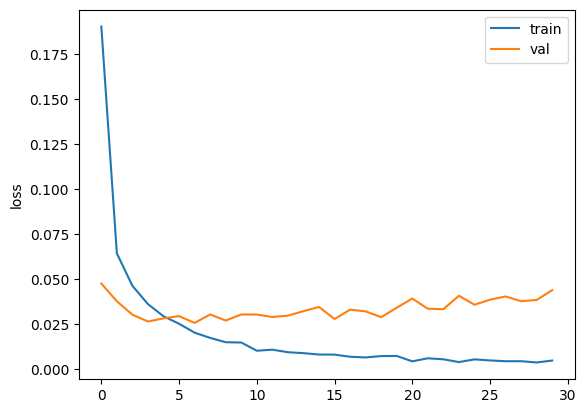

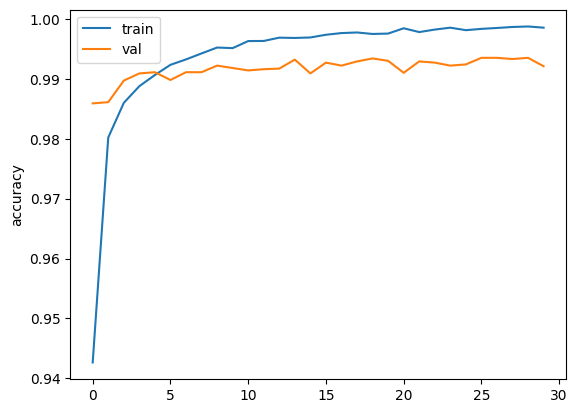

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model_history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_data=(test_images, test_labels), verbose=False)

# wykresy historii uczenia
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### ewaluacja modelu na zbiorze testowym

In [7]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9905 - loss: 0.0521


[0.04398738592863083, 0.9921000003814697]

### Testowanie modelu na 3 losowych wartościach testowych

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


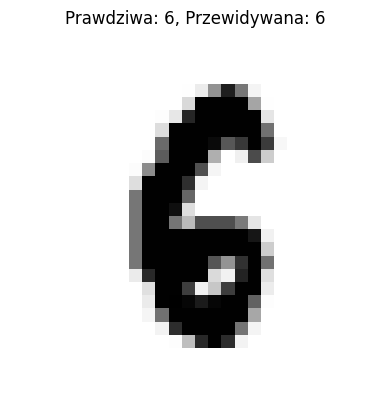

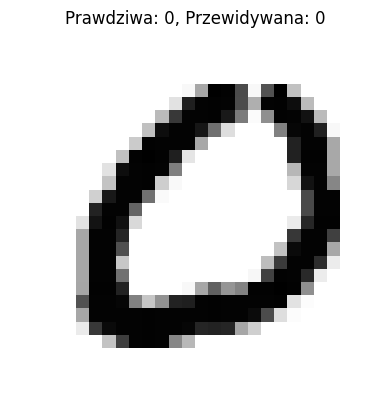

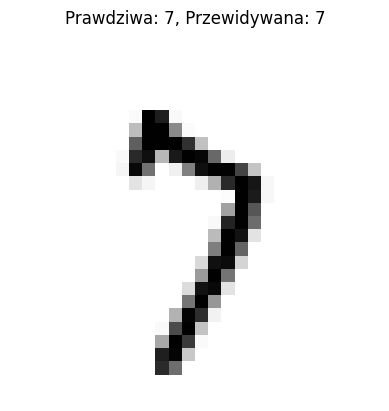

In [9]:
random_indices = np.random.choice(len(test_images), 3, replace=False)

# Wybranie losowych obrazów i etykiet
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]

# Przewidywanie klas dla losowych obrazów
probs = model.predict(random_images)
preds = np.argmax(probs, axis=1)

# Wyświetlenie obrazów i wyników predykcji
for i in range(3):
    plt.imshow(random_images[i], cmap='Greys')
    plt.title(f"Prawdziwa: {random_labels[i]}, Przewidywana: {preds[i]}")
    plt.axis('off')  # Wyłączenie osi dla czytelniejszej wizualizacji
    plt.show()